<p style="font-size:32px;text-align:center"> <b>Social network Graph Link Prediction - Facebook Challenge</b> </p>

* Apply XGBoost on all set of features

In [1]:
#Importing Libraries
# please do go through this python notebook: 
import warnings
warnings.filterwarnings("ignore")

import csv
import pandas as pd#pandas to create small dataframes 
import datetime #Convert to unix time
import time #Convert to unix time
# if numpy is not installed already : pip3 install numpy
import numpy as np#Do aritmetic operations on arrays
# matplotlib: used to plot graphs
import matplotlib
import matplotlib.pylab as plt
import seaborn as sns#Plots
from matplotlib import rcParams#Size of plots  
from sklearn.cluster import MiniBatchKMeans, KMeans#Clustering
import math
import pickle
import os
# to install xgboost: pip3 install xgboost
import xgboost as xgb

import warnings
import networkx as nx
import pdb
import pickle
from pandas import HDFStore,DataFrame
from pandas import read_hdf
from scipy.sparse.linalg import svds, eigs
import gc
from tqdm import tqdm
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score

In [2]:
#reading
from pandas import read_hdf
df_final_train = read_hdf('data/fea_sample/storage_sample_stage5.h5', 'train_df',mode='r')
df_final_test = read_hdf('data/fea_sample/storage_sample_stage5.h5', 'test_df',mode='r')

In [3]:
df_final_train.columns

Index(['source_node', 'destination_node', 'indicator_link',
       'jaccard_followers', 'jaccard_followees', 'cosine_followers',
       'cosine_followees', 'num_followers_s', 'num_followees_s',
       'num_followees_d', 'inter_followers', 'inter_followees', 'adar_index',
       'follows_back', 'same_comp', 'shortest_path', 'weight_in', 'weight_out',
       'weight_f1', 'weight_f2', 'weight_f3', 'weight_f4', 'page_rank_s',
       'page_rank_d', 'katz_s', 'katz_d', 'hubs_s', 'hubs_d', 'authorities_s',
       'authorities_d', 'svd_u_s_1', 'svd_u_s_2', 'svd_u_s_3', 'svd_u_s_4',
       'svd_u_s_5', 'svd_u_s_6', 'svd_u_d_1', 'svd_u_d_2', 'svd_u_d_3',
       'svd_u_d_4', 'svd_u_d_5', 'svd_u_d_6', 'svd_v_s_1', 'svd_v_s_2',
       'svd_v_s_3', 'svd_v_s_4', 'svd_v_s_5', 'svd_v_s_6', 'svd_v_d_1',
       'svd_v_d_2', 'svd_v_d_3', 'svd_v_d_4', 'svd_v_d_5', 'svd_v_d_6',
       'preferential_followers', 'preferential_followee', 'svd_dot_u',
       'svd_dot_v'],
      dtype='object')

In [4]:
y_train = df_final_train.indicator_link
y_test = df_final_test.indicator_link

In [5]:
df_final_train.drop(['source_node', 'destination_node','indicator_link'],axis=1,inplace=True)
df_final_test.drop(['source_node', 'destination_node','indicator_link'],axis=1,inplace=True)

In [6]:
from sklearn.metrics import f1_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint as sp_randint
from scipy.stats import uniform

param_dist = {"n_estimators":sp_randint(105,125),
              "max_depth": sp_randint(10,15),
              "min_samples_split": sp_randint(110,190),
              "min_samples_leaf": sp_randint(25,65)}

estimator1 = xgb.XGBRFClassifier(objective= 'binary:logistic',
eval_metric= 'auc',scale_pos_weight = 1,random_state=123)

Rsearch1= RandomizedSearchCV(estimator1,param_distributions=param_dist,scoring='f1',n_jobs=-1,iid=False, cv=10,verbose=20,random_state=123)

Rsearch1.fit(df_final_train,y_train)

Rsearch1.best_params_, Rsearch1.best_score_





Fitting 10 folds for each of 10 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:  4.9min
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:  4.9min
[Parallel(n_jobs=-1)]: Done   3 tasks      | elapsed:  4.9min
[Parallel(n_jobs=-1)]: Done   4 tasks      | elapsed:  5.0min
[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:  5.1min
[Parallel(n_jobs=-1)]: Done   6 tasks      | elapsed:  5.2min
[Parallel(n_jobs=-1)]: Done   7 tasks      | elapsed:  5.3min
[Parallel(n_jobs=-1)]: Done   8 tasks      | elapsed:  5.4min
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:  5.4min
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:  5.5min
[Parallel(n_jobs=-1)]: Done  11 tasks      | elapsed:  5.5min
[Parallel(n_jobs=-1)]: Done  12 tasks      | elapsed:  5.7min
[Parallel(n_jobs=-1)]: Done  13 tasks      | elapsed:  9.6min
[Parallel(n_jobs=-1)]: Done  14 tasks      | elapsed:  9.6min
[Parallel(n_jobs=-1)]: Done  15 tasks      | elapsed:  

({'max_depth': 14,
  'min_samples_leaf': 32,
  'min_samples_split': 162,
  'n_estimators': 111},
 0.9752599186184753)

In [10]:
print('mean test scores',Rsearch1.cv_results_['mean_test_score'])
print('mean train scores',Rsearch1.cv_results_['mean_train_score'])

mean test scores [0.97495516 0.97490435 0.97391152 0.97524967 0.97513524 0.97525992
 0.97460459 0.97463378 0.97487324 0.97500502]
mean train scores [0.98012707 0.98011011 0.97665432 0.98412549 0.98207422 0.98412161
 0.97826202 0.97826412 0.98013033 0.98012817]


In [11]:
print(Rsearch1.best_estimator_)
print(Rsearch1.best_params_)
print(Rsearch1.best_score_)

XGBRFClassifier(base_score=0.5, colsample_bylevel=1, colsample_bynode=0.8,
        colsample_bytree=1, eval_metric='auc', gamma=0, learning_rate=1,
        max_delta_step=0, max_depth=14, min_child_weight=1,
        min_samples_leaf=32, min_samples_split=162, missing=None,
        n_estimators=111, n_jobs=1, nthread=None,
        objective='binary:logistic', random_state=123, reg_alpha=0,
        reg_lambda=1, scale_pos_weight=1, seed=None, silent=None,
        subsample=0.8, verbosity=1)
{'max_depth': 14, 'min_samples_leaf': 32, 'min_samples_split': 162, 'n_estimators': 111}
0.9752599186184753


In [12]:
l=Rsearch1.best_params_["min_samples_leaf"]
d=Rsearch1.best_params_['max_depth']
s=Rsearch1.best_params_['min_samples_split']
n=Rsearch1.best_params_['n_estimators']

In [13]:

params={

 "colsample_bytree"        : [ 0.3, 0.4, 0.5 , 0.7 ,0.9],
 'subsample'               :[0.75,0.80,0.85,0.90],
 
  }
estimator2 =xgb.XGBRFClassifier(objective= 'binary:logistic',
eval_metric= 'auc',scale_pos_weight = 1,random_state=123,min_samples_leaf=l,max_depth=d,min_samples_split=s,n_estimators=n)

Rsearch2= RandomizedSearchCV(estimator2,param_distributions=params,scoring='f1',n_jobs=8,iid=False, cv=10,verbose=20,random_state=123)

Rsearch2.fit(df_final_train,y_train)

Rsearch2.best_params_, Rsearch2.best_score_


Fitting 10 folds for each of 10 candidates, totalling 100 fits


[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done   1 tasks      | elapsed:  3.6min
[Parallel(n_jobs=8)]: Done   2 tasks      | elapsed:  3.6min
[Parallel(n_jobs=8)]: Done   3 tasks      | elapsed:  3.7min
[Parallel(n_jobs=8)]: Done   4 tasks      | elapsed:  3.7min
[Parallel(n_jobs=8)]: Done   5 tasks      | elapsed:  3.7min
[Parallel(n_jobs=8)]: Done   6 tasks      | elapsed:  3.7min
[Parallel(n_jobs=8)]: Done   7 tasks      | elapsed:  3.7min
[Parallel(n_jobs=8)]: Done   8 tasks      | elapsed:  3.8min
[Parallel(n_jobs=8)]: Done   9 tasks      | elapsed:  6.1min
[Parallel(n_jobs=8)]: Done  10 tasks      | elapsed:  6.2min
[Parallel(n_jobs=8)]: Done  11 tasks      | elapsed:  6.3min
[Parallel(n_jobs=8)]: Done  12 tasks      | elapsed:  6.3min
[Parallel(n_jobs=8)]: Done  13 tasks      | elapsed:  6.4min
[Parallel(n_jobs=8)]: Done  14 tasks      | elapsed:  6.4min
[Parallel(n_jobs=8)]: Done  15 tasks      | elapsed:  7.7min
[Parallel(

({'subsample': 0.9, 'colsample_bytree': 0.7}, 0.9763584065708976)

In [14]:
print('mean test scores',Rsearch2.cv_results_['mean_test_score'])
print('mean train scores',Rsearch2.cv_results_['mean_train_score'])

mean test scores [0.97627664 0.97301346 0.97312313 0.97584652 0.97473781 0.97323604
 0.97604416 0.97610672 0.96676965 0.97635841]
mean train scores [0.98412493 0.98180375 0.98146221 0.984066   0.98218644 0.98228958
 0.98471213 0.98343495 0.97811598 0.98427952]


In [15]:
print(Rsearch2.best_estimator_)
print(Rsearch2.best_params_)
print(Rsearch2.best_score_)

XGBRFClassifier(base_score=0.5, colsample_bylevel=1, colsample_bynode=0.8,
        colsample_bytree=0.7, eval_metric='auc', gamma=0, learning_rate=1,
        max_delta_step=0, max_depth=14, min_child_weight=1,
        min_samples_leaf=32, min_samples_split=162, missing=None,
        n_estimators=111, n_jobs=1, nthread=None,
        objective='binary:logistic', random_state=123, reg_alpha=0,
        reg_lambda=1, scale_pos_weight=1, seed=None, silent=None,
        subsample=0.9, verbosity=1)
{'subsample': 0.9, 'colsample_bytree': 0.7}
0.9763584065708976


In [16]:
col=Rsearch2.best_params_["colsample_bytree"]
sub=Rsearch2.best_params_['subsample']


In [17]:

params={"learning_rate"    : [0.05, 0.10, 0.15, 0.20, 0.25, 0.30,0.5 ] ,
 "gamma"                   : [ 0.01,0.0, 0.1, 0.2 , 0.3, 0.4 ],
 
  }

estimator3 = xgb.XGBRFClassifier(objective= 'binary:logistic',
eval_metric= 'auc',scale_pos_weight = 1,random_state=123,min_samples_leaf=l,max_depth=d,min_samples_split=s,n_estimators=n,colsample_bytree=col,subsample=sub)
Rsearch3= RandomizedSearchCV(estimator3,param_distributions=params,scoring='f1',n_jobs=8,iid=False, cv=10,random_state=123,verbose=20)
Rsearch3.fit(df_final_train,y_train)
Rsearch3.best_params_, Rsearch3.best_score_


Fitting 10 folds for each of 10 candidates, totalling 100 fits


[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done   1 tasks      | elapsed:  4.2min
[Parallel(n_jobs=8)]: Done   2 tasks      | elapsed:  4.3min
[Parallel(n_jobs=8)]: Done   3 tasks      | elapsed:  4.3min
[Parallel(n_jobs=8)]: Done   4 tasks      | elapsed:  4.3min
[Parallel(n_jobs=8)]: Done   5 tasks      | elapsed:  4.3min
[Parallel(n_jobs=8)]: Done   6 tasks      | elapsed:  4.3min
[Parallel(n_jobs=8)]: Done   7 tasks      | elapsed:  4.3min
[Parallel(n_jobs=8)]: Done   8 tasks      | elapsed:  4.4min
[Parallel(n_jobs=8)]: Done   9 tasks      | elapsed:  8.4min
[Parallel(n_jobs=8)]: Done  10 tasks      | elapsed:  8.5min
[Parallel(n_jobs=8)]: Done  11 tasks      | elapsed:  8.5min
[Parallel(n_jobs=8)]: Done  12 tasks      | elapsed:  8.5min
[Parallel(n_jobs=8)]: Done  13 tasks      | elapsed:  8.5min
[Parallel(n_jobs=8)]: Done  14 tasks      | elapsed:  8.5min
[Parallel(n_jobs=8)]: Done  15 tasks      | elapsed:  8.5min
[Parallel(

({'learning_rate': 0.5, 'gamma': 0.2}, 0.9763889156047381)

In [18]:
print('mean test scores',Rsearch3.cv_results_['mean_test_score'])
print('mean train scores',Rsearch3.cv_results_['mean_train_score'])

mean test scores [0.97638892 0.97635841 0.97635841 0.97637909 0.97635841 0.97635841
 0.97635841 0.97635841 0.97637909 0.97638892]
mean train scores [0.98423793 0.98427952 0.98427952 0.98419282 0.98427952 0.98427725
 0.98427725 0.98427725 0.98419282 0.98423793]


In [19]:
print(Rsearch3.best_estimator_)
print(Rsearch3.best_params_)
print(Rsearch3.best_score_)

XGBRFClassifier(base_score=0.5, colsample_bylevel=1, colsample_bynode=0.8,
        colsample_bytree=0.7, eval_metric='auc', gamma=0.2,
        learning_rate=0.5, max_delta_step=0, max_depth=14,
        min_child_weight=1, min_samples_leaf=32, min_samples_split=162,
        missing=None, n_estimators=111, n_jobs=1, nthread=None,
        objective='binary:logistic', random_state=123, reg_alpha=0,
        reg_lambda=1, scale_pos_weight=1, seed=None, silent=None,
        subsample=0.9, verbosity=1)
{'learning_rate': 0.5, 'gamma': 0.2}
0.9763889156047381


In [20]:
rate = Rsearch3.best_params_["learning_rate"]
g = Rsearch3.best_params_['gamma']


In [21]:

params={
 'reg_alpha'               :[0, 0.001, 0.005, 0.01, 0.05],
 'reg_lamda'               :[0,0.0001, 0.001, 0.005, 0.01, 0.05],
  }
estimator4 = xgb.XGBRFClassifier(objective= 'binary:logistic',
eval_metric= 'auc',scale_pos_weight = 1,random_state=123,min_samples_leaf=l,max_depth=d,min_samples_split=s,n_estimators=n,colsample_bytree=col,subsample=sub,learning_rate=rate,gamma=g)
Rsearch4= RandomizedSearchCV(estimator4,param_distributions=params,scoring='f1',n_jobs=8,iid=False, cv=10,random_state=123,verbose=20)
Rsearch4.fit(df_final_train,y_train)
Rsearch4.best_params_, Rsearch4.best_score_


Fitting 10 folds for each of 10 candidates, totalling 100 fits


[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done   1 tasks      | elapsed:  3.4min
[Parallel(n_jobs=8)]: Done   2 tasks      | elapsed:  3.4min
[Parallel(n_jobs=8)]: Done   3 tasks      | elapsed:  3.4min
[Parallel(n_jobs=8)]: Done   4 tasks      | elapsed:  3.4min
[Parallel(n_jobs=8)]: Done   5 tasks      | elapsed:  3.4min
[Parallel(n_jobs=8)]: Done   6 tasks      | elapsed:  3.4min
[Parallel(n_jobs=8)]: Done   7 tasks      | elapsed:  3.4min
[Parallel(n_jobs=8)]: Done   8 tasks      | elapsed:  3.4min
[Parallel(n_jobs=8)]: Done   9 tasks      | elapsed:  7.4min
[Parallel(n_jobs=8)]: Done  10 tasks      | elapsed:  7.4min
[Parallel(n_jobs=8)]: Done  11 tasks      | elapsed:  7.6min
[Parallel(n_jobs=8)]: Done  12 tasks      | elapsed:  7.6min
[Parallel(n_jobs=8)]: Done  13 tasks      | elapsed:  7.6min
[Parallel(n_jobs=8)]: Done  14 tasks      | elapsed:  7.7min
[Parallel(n_jobs=8)]: Done  15 tasks      | elapsed:  7.7min
[Parallel(

({'reg_lamda': 0.0001, 'reg_alpha': 0.001}, 0.9763992303345269)

In [22]:
print('mean test scores',Rsearch4.cv_results_['mean_test_score'])
print('mean train scores',Rsearch4.cv_results_['mean_train_score'])

mean test scores [0.97639923 0.97634729 0.97638892 0.97634729 0.97639923 0.97634729
 0.97635899 0.97631866 0.97639923 0.97631866]
mean train scores [0.98423676 0.984126   0.98423793 0.984126   0.98423676 0.984126
 0.98422454 0.98420881 0.98423676 0.98420881]


In [23]:
print(Rsearch4.best_estimator_)
print(Rsearch4.best_params_)
print(Rsearch4.best_score_)

XGBRFClassifier(base_score=0.5, colsample_bylevel=1, colsample_bynode=0.8,
        colsample_bytree=0.7, eval_metric='auc', gamma=0.2,
        learning_rate=0.5, max_delta_step=0, max_depth=14,
        min_child_weight=1, min_samples_leaf=32, min_samples_split=162,
        missing=None, n_estimators=111, n_jobs=1, nthread=None,
        objective='binary:logistic', random_state=123, reg_alpha=0.001,
        reg_lambda=1, reg_lamda=0.0001, scale_pos_weight=1, seed=None,
        silent=None, subsample=0.9, verbosity=1)
{'reg_lamda': 0.0001, 'reg_alpha': 0.001}
0.9763992303345269


In [24]:
alpha = Rsearch4.best_params_["reg_alpha"]
lamda = Rsearch4.best_params_['reg_lamda']


In [42]:
final_clf = xgb.XGBRFClassifier(base_score=0.5, colsample_bylevel=1, colsample_bynode=0.8,
        colsample_bytree=0.7, eval_metric='auc', gamma=0.2,
        learning_rate=0.5, max_delta_step=0, max_depth=14,
        min_child_weight=1, min_samples_leaf=32, min_samples_split=162,
        missing=None, n_estimators=111, n_jobs=1, nthread=None,
        objective='binary:logistic', random_state=123, reg_alpha=0.001,
        reg_lambda=1, reg_lamda=0.0001, scale_pos_weight=1, seed=None,
        silent=None, subsample=0.9, verbosity=1)

final_clf.fit(df_final_train,y_train)



XGBRFClassifier(base_score=0.5, colsample_bylevel=1, colsample_bynode=0.8,
        colsample_bytree=0.7, eval_metric='auc', gamma=0.2,
        learning_rate=0.5, max_delta_step=0, max_depth=14,
        min_child_weight=1, min_samples_leaf=32, min_samples_split=162,
        missing=None, n_estimators=111, n_jobs=1, nthread=None,
        objective='binary:logistic', random_state=123, reg_alpha=0.001,
        reg_lambda=1, reg_lamda=0.0001, scale_pos_weight=1, seed=None,
        silent=None, subsample=0.9, verbosity=1)

In [44]:
predict_y_test_final = final_clf.predict(df_final_test)
predict_y_train_final = final_clf.predict(df_final_train)

print("The train f1 score is:",f1_score(y_train,predict_y_train_final))
print("The test f1 score is:",f1_score(y_test,predict_y_test_final))

The train f1 score is: 0.9837379545065502
The test f1 score is: 0.9324856318814341


In [46]:
from sklearn.metrics import confusion_matrix
def plot_confusion_matrix(test_y, predict_y):
    C = confusion_matrix(test_y, predict_y)
    
    A =(((C.T)/(C.sum(axis=1))).T)
    
    B =(C/C.sum(axis=0))
    plt.figure(figsize=(20,4))
    
    labels = [0,1]
    # representing A in heatmap format
    cmap=sns.light_palette("blue")
    plt.subplot(1, 3, 1)
    sns.heatmap(C, annot=True, cmap=cmap, fmt=".3f", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.title("Confusion matrix")
    
    plt.subplot(1, 3, 2)
    sns.heatmap(B, annot=True, cmap=cmap, fmt=".3f", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.title("Precision matrix")
    
    plt.subplot(1, 3, 3)
    # representing B in heatmap format
    sns.heatmap(A, annot=True, cmap=cmap, fmt=".3f", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.title("Recall matrix")
    
    plt.show()

Train confusion_matrix


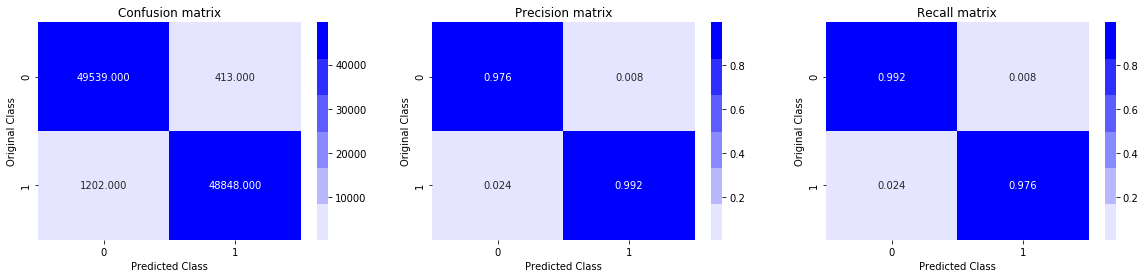

Test confusion_matrix


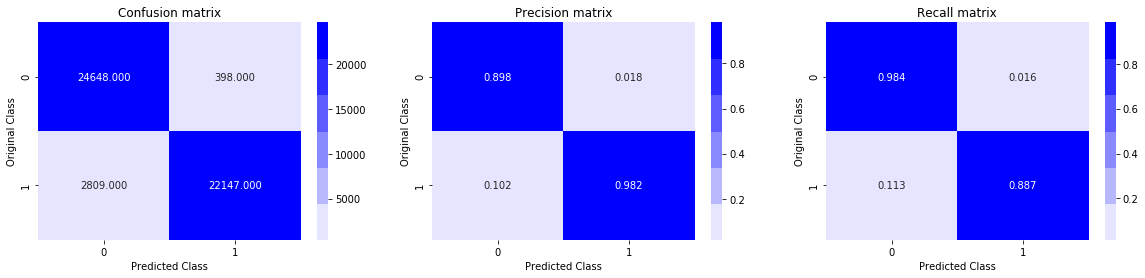

In [48]:
print('Train confusion_matrix')
plot_confusion_matrix(y_train,predict_y_train_final)
print('Test confusion_matrix')
plot_confusion_matrix(y_test,predict_y_test_final)

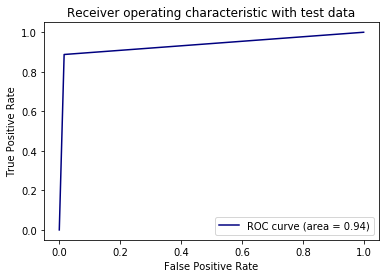

In [51]:
from sklearn.metrics import roc_curve, auc

fpr,tpr,ths = roc_curve(y_test,predict_y_test_final)
auc_sc = auc(fpr, tpr)
plt.plot(fpr, tpr, color='navy',label='ROC curve (area = %0.2f)' % auc_sc)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic with test data')
plt.legend()
plt.show()

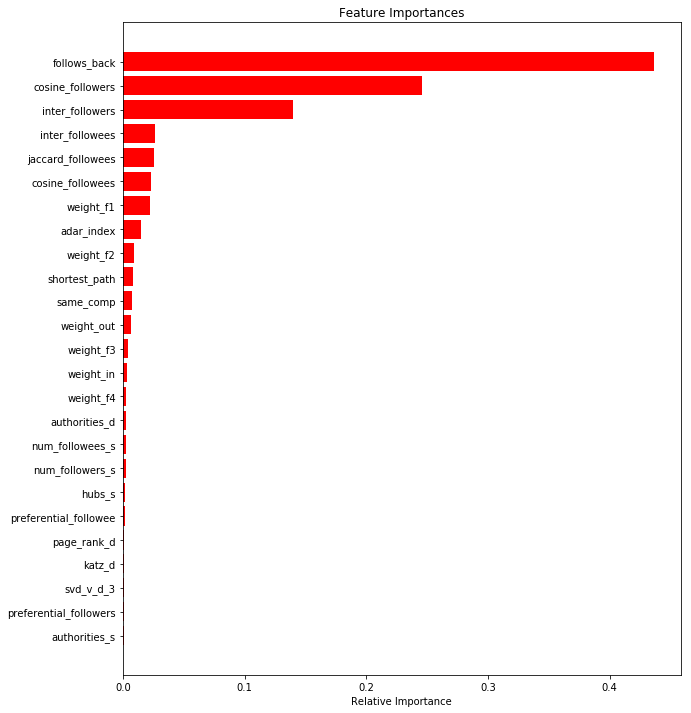

In [52]:
features = df_final_train.columns
importances = final_clf.feature_importances_
indices = (np.argsort(importances))[-25:]
plt.figure(figsize=(10,12))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='r', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

# Observations

* AUC on Train : 1.0
* AUC on Test : 0.94

* f1 Score on Train : 0.9837
* f1 Score on Test : 0.9324